In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('WHO.csv')

In [3]:
data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,0.0,1140,0.0,0.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,0.0,8820,0.0,0.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,0.0,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,0.00,82,3.2,75.49,0.0,0,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2


In [4]:
data.shape

(194, 13)

In [5]:
data[data == 0].count()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

In [6]:
data.columns

Index(['Country', 'Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
       'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
       'PrimarySchoolEnrollmentFemale'],
      dtype='object')

In [7]:
data['Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [8]:
for i in data['Region'].unique():
    li = list(data[(data['FertilityRate'] == 0.0) & (data['Region'] == i)].index)
    data['FertilityRate'][li] = data['FertilityRate'][data['Region'] == i].mean()
    
for i in data['Region'].unique():
    li = list(data[(data['CellularSubscribers'] == 0.0) & (data['Region'] == i)].index)
    data['CellularSubscribers'][li] = data['CellularSubscribers'][data['Region'] == i].mean()

for i in data['Region'].unique():
    li = list(data[(data['LiteracyRate'] == 0.0) & (data['Region'] == i)].index)
    data['LiteracyRate'][li] = data['LiteracyRate'][data['LiteracyRate']!=0][data['Region'] == i].mean()
    
for i in data['Region'].unique():
    li = list(data[(data['GNI'] == 0.0) & (data['Region'] == i)].index)
    data['GNI'][li] = data['GNI'][data['Region'] == i].mean()

C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
from scipy import stats
import numpy as np
li = list(data['Population'][np.abs(stats.zscore(data['Population'])) > 3].index)
li

[35, 77]

In [10]:
import matplotlib.pyplot as plt

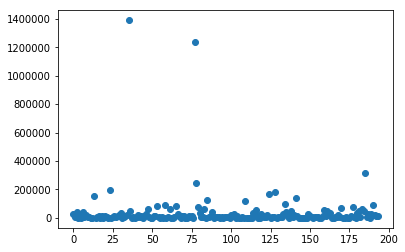

In [11]:
plt.scatter(data['Population'].index, data['Population'])

In [12]:
data['Population'][li] = data.drop(li)['Population'].mean()

C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


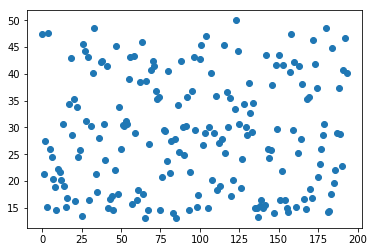

In [13]:
plt.scatter(data['Under15'].index, data['Under15'])

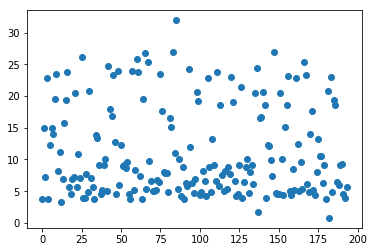

In [14]:
plt.scatter(data['Over60'].index, data['Over60'])

In [15]:
li = list(data['GNI'][np.abs(stats.zscore(data['GNI'])) > 4].index)
li

[137]

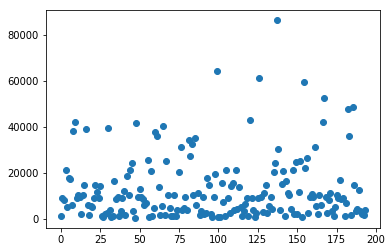

In [16]:
plt.scatter(data['GNI'].index, data['GNI'])

In [17]:
data['GNI'][li] = data['GNI'].sort_values().iloc[-2]

C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


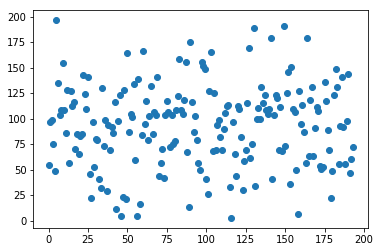

In [18]:
plt.scatter(data['CellularSubscribers'].index, data['CellularSubscribers'])

In [19]:
data.drop('Country', axis=1, inplace=True)

In [20]:
data.head()

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Eastern Mediterranean,29825.0,47.42,3.82,5.400000,60,98.5,54.26,82.520000,1140.000000,0.0,0.0
1,Europe,3162.0,21.33,14.93,1.750000,74,16.7,96.39,98.780769,8820.000000,0.0,0.0
2,Africa,38482.0,27.42,7.17,2.830000,73,20.0,98.99,69.091667,8310.000000,98.2,96.4
3,Europe,78.0,15.20,22.86,1.661509,82,3.2,75.49,98.780769,21272.641509,78.4,79.4
4,Africa,20821.0,47.58,3.84,6.100000,51,163.5,48.38,70.100000,5230.000000,93.1,78.2


In [21]:
sorted(data.Region.unique())

['Africa',
 'Americas',
 'Eastern Mediterranean',
 'Europe',
 'South-East Asia',
 'Western Pacific']

In [22]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [23]:
data.head()

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,2,29825.0,47.42,3.82,5.400000,60,98.5,54.26,82.520000,1140.000000,0.0,0.0
1,3,3162.0,21.33,14.93,1.750000,74,16.7,96.39,98.780769,8820.000000,0.0,0.0
2,0,38482.0,27.42,7.17,2.830000,73,20.0,98.99,69.091667,8310.000000,98.2,96.4
3,3,78.0,15.20,22.86,1.661509,82,3.2,75.49,98.780769,21272.641509,78.4,79.4
4,0,20821.0,47.58,3.84,6.100000,51,163.5,48.38,70.100000,5230.000000,93.1,78.2


In [24]:
X = data.drop(['LifeExpectancy','PrimarySchoolEnrollmentMale','PrimarySchoolEnrollmentFemale'], axis=1)

In [25]:
y = data['LifeExpectancy']

In [26]:
X.columns

Index(['Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'ChildMortality', 'CellularSubscribers', 'LiteracyRate', 'GNI'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X,y, test_size=0.5)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
mlrm = LinearRegression()

In [30]:
mlrm.fit(trainX,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
mlrm.score(trainX,trainy)*100

89.40076516162374

In [32]:
mlrm.score(testX,testy)*100

87.73323419038938

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X)

pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

C:\Users\cools\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                  235.297366
Region                   1.490369
Population               1.044612
Under15                 17.166265
Over60                   3.944646
FertilityRate           12.885726
ChildMortality           4.793951
CellularSubscribers      1.962234
LiteracyRate             2.581484
GNI                      2.215388
dtype: float64

In [34]:
import scipy.stats as stats
stats.f_oneway(X['Region'],y)

F_onewayResult(statistic=10082.885411564352, pvalue=9.706078097650169e-279)

In [35]:
columns = list(X.columns)
columns.remove('Region')
print(columns)

correlation = pd.Series([np.abs(np.corrcoef(X[i],y)[0,1]) 
                         for i in columns], index=columns)
correlation

['Population', 'Under15', 'Over60', 'FertilityRate', 'ChildMortality', 'CellularSubscribers', 'LiteracyRate', 'GNI']


Population             0.025057
Under15                0.836467
Over60                 0.688129
FertilityRate          0.831073
ChildMortality         0.924564
CellularSubscribers    0.613010
LiteracyRate           0.704487
GNI                    0.643510
dtype: float64

In [36]:
X.drop('Population', axis=1, inplace=True)

In [37]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X,y, test_size=0.5)

from sklearn.linear_model import LinearRegression

mlrm = LinearRegression()

mlrm.fit(trainX,trainy)

print(mlrm.score(trainX,trainy)*100)
print(mlrm.score(testX,testy)*100)

89.76325249511227
86.92932333951995


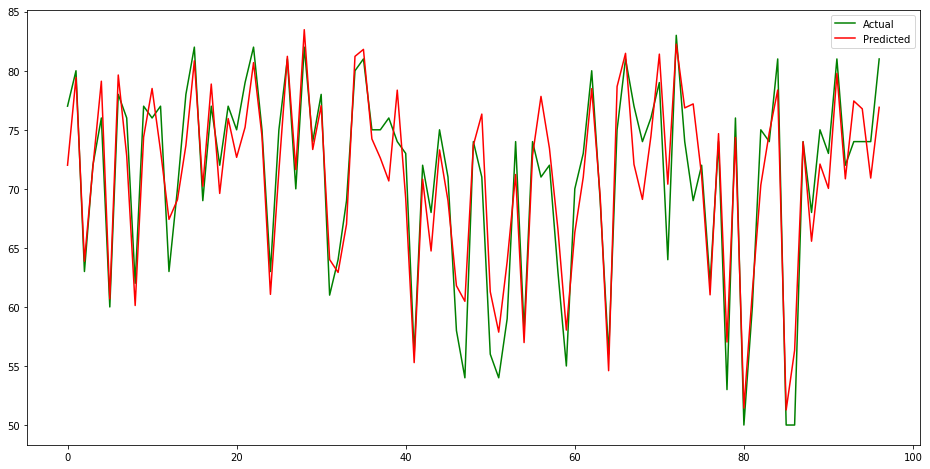

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
# plt.subplot(211)
plt.plot(testy.reset_index(drop=True), label='Actual', color='g')
# plt.subplot(212)
plt.plot(mlrm.predict(testX), label='Predicted', color='r')
plt.legend(loc='upper right')

In [39]:
data = pd.read_csv('WHO.csv')
data.shape

(194, 13)

In [40]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [41]:
X = data.drop('LifeExpectancy', axis=1)

y = data['LifeExpectancy']

In [42]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(X) 
scaled_data = scalar.transform(X) 

# Importing PCA 
from sklearn.decomposition import PCA 
  
# Let's say, components = 2 
pca = PCA() 
pca.fit(scaled_data) 


variance = pca.explained_variance_ratio_ #calculate variance ratios
print(np.round(pca.explained_variance_ratio_, decimals=3)*100)

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)



C:\Users\cools\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


[36.9 16.8  9.6  8.9  8.2  6.8  4.8  3.6  2.6  1.3  0.5  0. ]
[ 36.9  53.7  63.3  72.2  80.4  87.2  92.   95.6  98.2  99.5 100.  100. ]


In [43]:
pca = PCA(n_components=8) 
X_transformed = pca.fit_transform(X) 

X_transformed.shape

(194, 8)

In [44]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X_transformed,y, test_size=0.5, random_state=1)

from sklearn.linear_model import LinearRegression

mlrm = LinearRegression()

mlrm.fit(trainX,trainy)

print(mlrm.score(trainX,trainy)*100)
print(mlrm.score(testX,testy)*100)

91.19113620610396
86.39112109776251


In [45]:
data.dtypes

Country                            int32
Region                             int32
Population                         int64
Under15                          float64
Over60                           float64
FertilityRate                    float64
LifeExpectancy                     int64
ChildMortality                   float64
CellularSubscribers              float64
LiteracyRate                     float64
GNI                                int64
PrimarySchoolEnrollmentMale      float64
PrimarySchoolEnrollmentFemale    float64
dtype: object